In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import re
# import nltk
def process(text):
    text = re.sub(r'[\,\./;()"-\[\]]'," ",text)
    text = text.split()
    text.sort()
    return(" ".join(text))

In [20]:
data = pd.read_table("data\\imdb-title-cast-rating-desc.tsv")
data = data[["title","genre","cast","rating","description"]].dropna()

In [21]:
# data['genre'] = data['genre'].map(lambda x : x.lower().replace(','," ").split())
# data['cast'] = data['cast'].map(lambda x : x.lower().split()[:5])
# data['description'] = data['description'].map(lambda x : process(x))

In [22]:
data['genre'] = data['genre'].map(lambda x : " ".join(sorted(x.lower().replace(','," ").split())))
data['cast'] = data['cast'].map(lambda x : " ".join(sorted(x.lower().replace("nm"," ").split()[:5])))
data['description'] = data['description'].map(lambda x : process(x))
data['desc_set'] = data["description"].map(lambda x: " ".join(set(x.lower().split())))

In [23]:
data

,title,genre,cast,rating,description,desc_set
0,The Green Archer,action adventure crime,0186608 0279963 0345300 0430460 0580585,6.6,accompanied action adaptation after agle ahead...,some story hen finds in olumbia to evidently h...
1,The German Weekly Review,documentary news,0324305 0351425 0381523 0386944 2233358,7.7,alerno aptain apture at at bruzzi eachhead eav...,roops at hown eavy ountains eachhead escued in...
2,Americana,family game-show,0175091 0202565 0272126 0304443 0564535,3.0,a ach aired and and artin ason at at by by by ...,at television critic minute on a ondays produc...
3,Kraft Theatre,drama,0181961 0379051 0550855 0572844 0853299,8.4,a adaptations added addition advertising agenc...,at months hour moved promote in airing additio...
5,Actor's Studio,drama,0175091 0291507 0358449 0384696 1169111,7.1,a actors adapted aired alsam alternating ames ...,original some mong hour field moved in rwin re...
...,...,...,...,...,...,...
70953,History Erased,documentary,10276784 11776042 4953926 6177643 8943457,6.6,a accomplishments alternate amous and and and ...,realities speculating great them timeline amou...
70956,Blown Away,reality-tv,11261411 11261413 4509752 4903469 5998859,7.1,and artists challenges champion chance en for ...,champion heat in title en glassblowing sculptu...
70957,Race Across the World,documentary game-show,11551611 11551612 11551631 11551632 11551633,8.3,a airs ar ast flight in no of race reach sight...,single ast no a ar smartphone travellers airs ...
70967,Zalim Istanbul,drama,0476334 1728957 7487579 8823972 9619191,5.7,a a a a after after after again agreed and and...,changes married family dramatically she a true...


In [25]:
data["genre"].astype("category").cat.codes

0          7
1        596
2        699
3        612
5        612
        ... 
70953    556
70956    827
70957    572
70967    612
70973    612
Length: 27308, dtype: int16

In [27]:

dd = data.copy()


In [30]:
dd = dd.apply(lambda x: x.astype("category").cat.codes)
dd["rating"] = data["rating"]
dd

,title,genre,cast,rating,description,desc_set
0,21428,7,10890,6.6,20830,21393
1,21289,596,13574,7.7,23607,20201
2,1269,699,10598,3.0,13277,4060
3,11353,612,10772,8.4,14203,3100
5,681,612,10599,7.1,13980,17413
...,...,...,...,...,...,...
70953,9206,556,20113,6.6,13099,19703
70956,2879,827,21621,7.1,25834,5735
70957,16637,572,21962,8.3,16491,20823
70967,26052,612,16132,5.7,3456,5769


In [33]:
cm = dd.corr()

<AxesSubplot:>

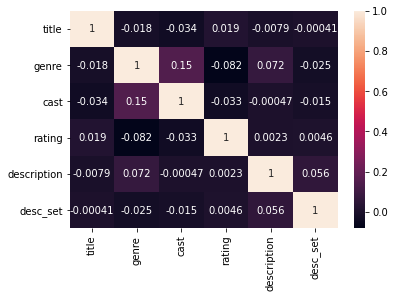

In [34]:
sns.heatmap(cm,annot=True)

In [37]:
sorted_mat = cm.unstack().sort_values(ascending=False)
print(sorted_mat)

title        title          1.000000
genre        genre          1.000000
description  description    1.000000
rating       rating         1.000000
cast         cast           1.000000
desc_set     desc_set       1.000000
cast         genre          0.147246
genre        cast           0.147246
             description    0.071510
description  genre          0.071510
desc_set     description    0.055682
description  desc_set       0.055682
title        rating         0.018993
rating       title          0.018993
desc_set     rating         0.004649
rating       desc_set       0.004649
             description    0.002323
description  rating         0.002323
desc_set     title         -0.000412
title        desc_set      -0.000412
description  cast          -0.000468
cast         description   -0.000468
title        description   -0.007874
description  title         -0.007874
cast         desc_set      -0.015384
desc_set     cast          -0.015384
genre        title         -0.017826
t